<a href="https://colab.research.google.com/github/Hemasankar007/Slash-Mark_BasicLevel/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-**3**

 MNIST Digit **Classification**


Loading MNIST Data...

Loading Training Data...

Loading Testing Data...

Preparing Classifier Training and Validation Data...

KNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10

Pickling the Classifier for Future Use...

Calculating Accuracy of trained Classifier...

Making Predictions on Validation Data...

Calculating Accuracy of Predictions...

Creating Confusion Matrix...

KNN Trained Classifier Confidence:  0.9701666666666666

Predicted Values:  [6 3 8 ... 3 1 9]

Accuracy of Classifier on Validation Image Data:  0.9701666666666666

Confusion Matrix: 
 [[578   0   0   0   0   1   0   0   0   1]
 [  0 685   0   0   0   0   0   0   0   0]
 [  5   7 541   1   1   1   1   9   1   0]
 [  1   1   5 595   0   6   0   3   6   2]
 [  0   6   1   0 541   0   2   1   0  10]
 [  3   3   0   7   0 515   7   0   1   2]
 [  2   1   0   0   0   2 604   0   0   0]
 [  0   7   2   0   2   0   0 624   0   2]
 [  0   6   1  11   1  10   2   3 553   6]
 [  4   3   2   4   6   0   0 

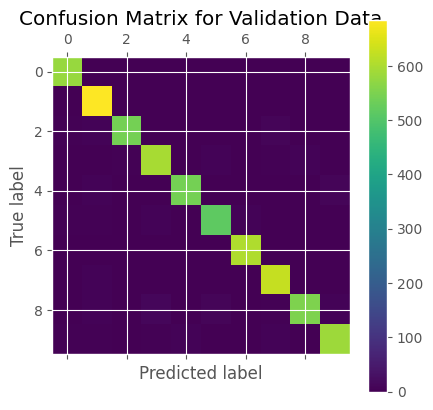


Making Predictions on Test Input Images...

Calculating Accuracy of Trained Classifier on Test Data... 

 Creating Confusion Matrix for Test Data...

Predicted Labels for Test Images:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Test Images:  0.9686

Confusion Matrix for Test Data: 
 [[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    7  992    2    0    0    2   15    4    0]
 [   0    3    3  977    1   12    1    6    2    5]
 [   3    6    0    0  943    0    4    2    1   23]
 [   4    0    0   14    2  862    3    1    1    5]
 [   5    3    0    0    3    1  946    0    0    0]
 [   0   22    3    0    3    0    0  990    0   10]
 [   7    2    7   16    6   11    4    7  909    5]
 [   5    7    3    8    9    3    1   11    2  960]]


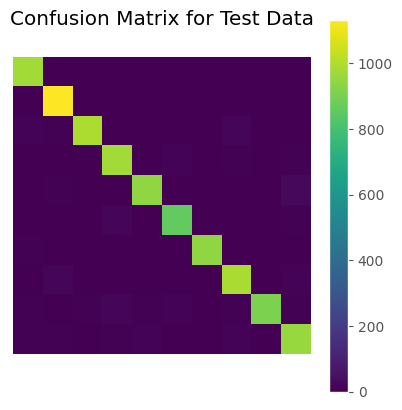

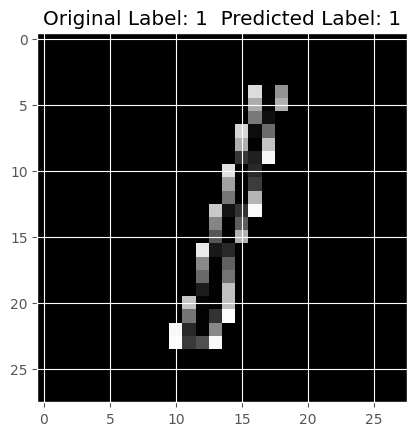

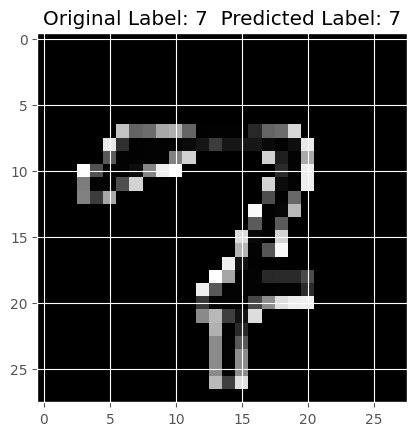

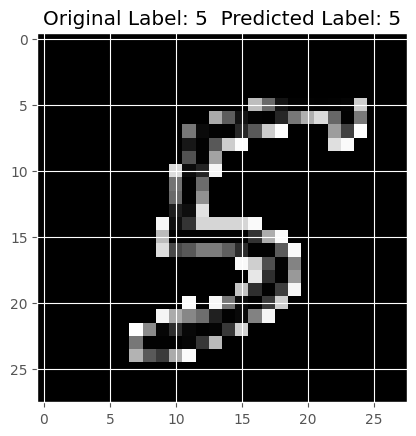

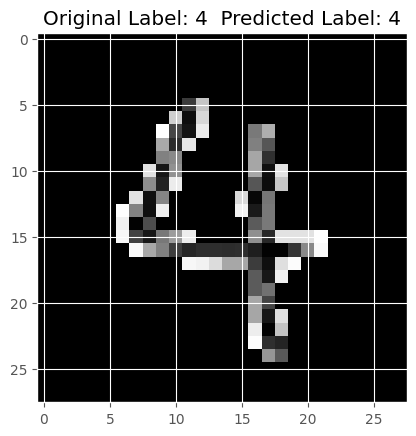

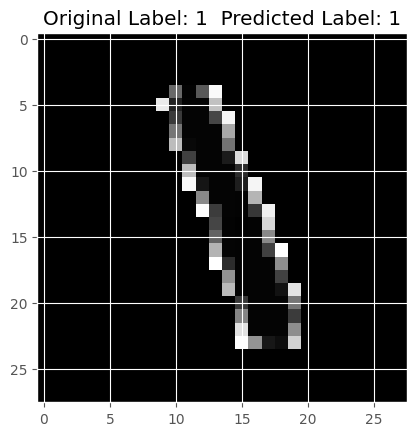

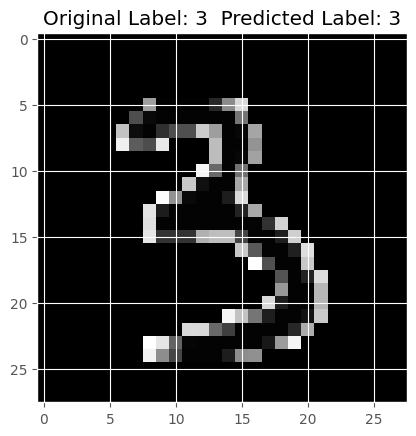

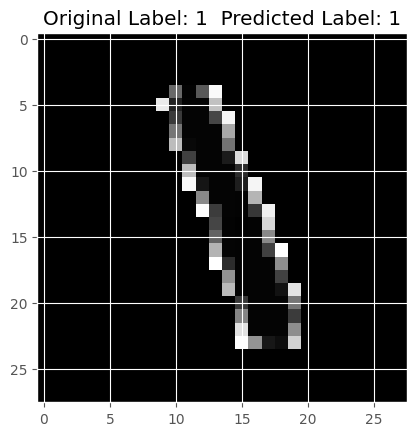

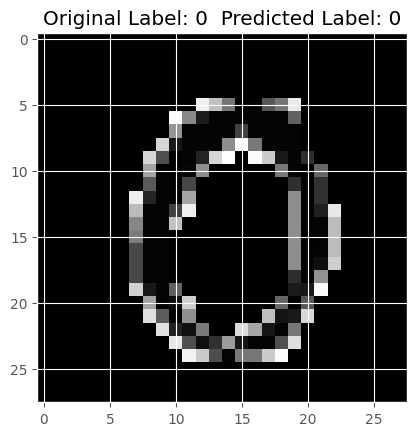

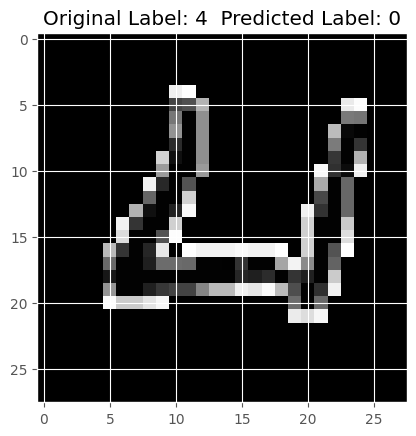

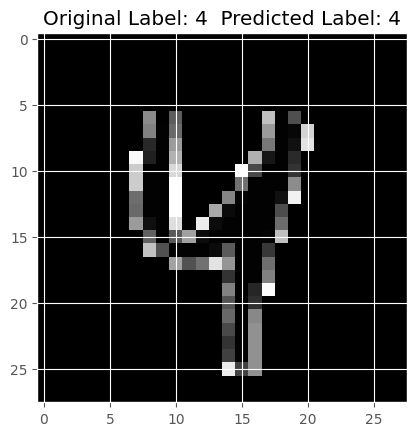

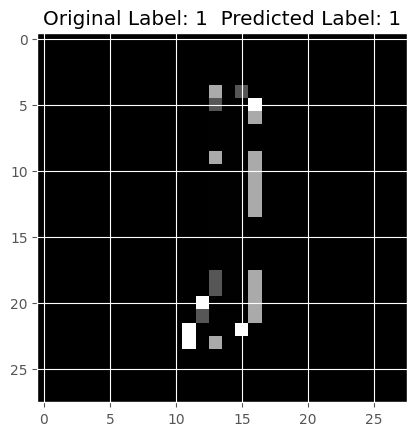

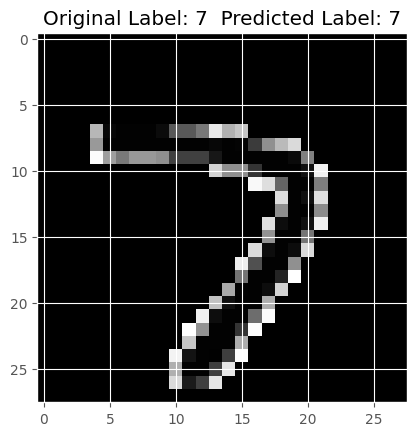

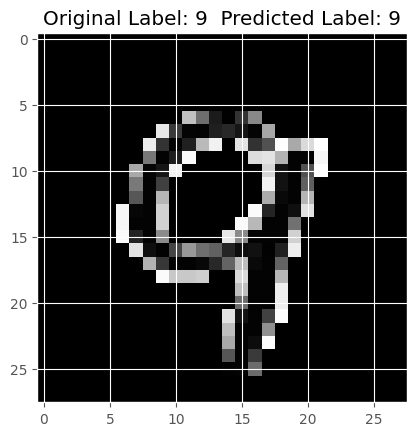

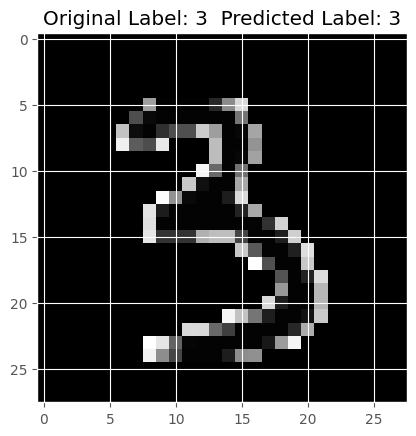

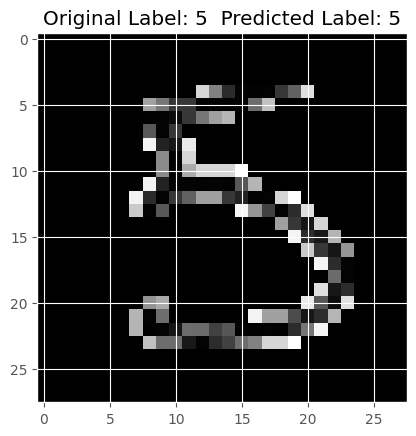

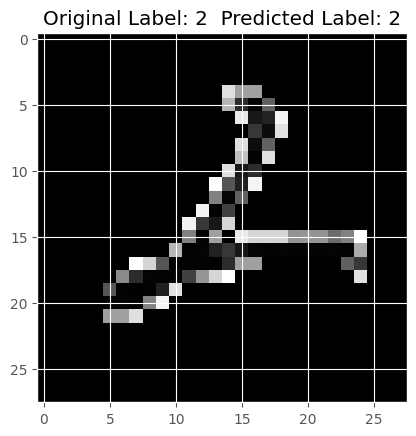

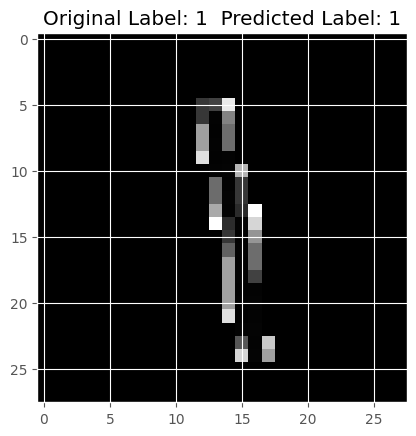

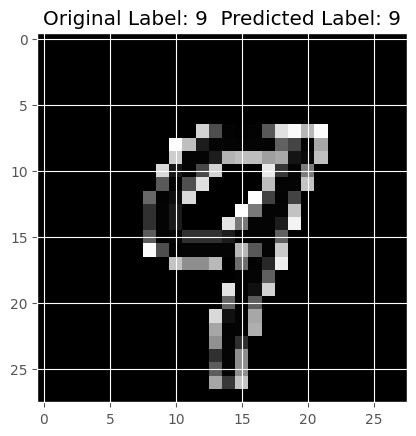

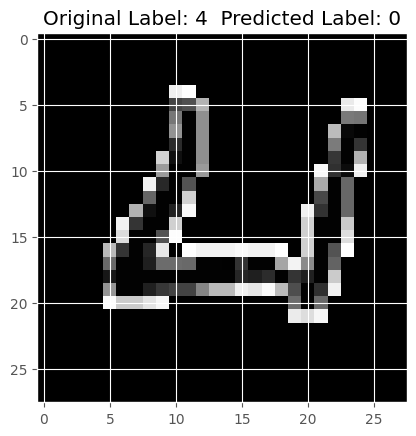

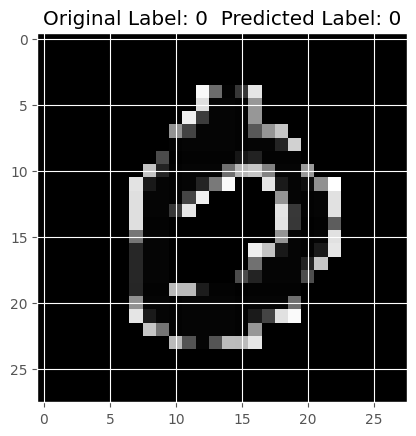

In [ ]:
# K Nearest Neighbors

import sys
import numpy as np
import pickle
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')



# old_stdout = sys.stdout
# log_file = open("summary.log","w")
# sys.stdout = log_file


print('\nLoading MNIST Data...')
# data = MNIST('./python-mnist/data/')

data = MNIST('/content/MNIST_Dataset_Loader')

print('\nLoading Training Data...')
img_train, labels_train = data.load_training()
train_img = np.array(img_train)
train_labels = np.array(labels_train)

print('\nLoading Testing Data...')
img_test, labels_test = data.load_testing()
test_img = np.array(img_test)
test_labels = np.array(labels_test)


#Features
X = train_img

#Labels
y = train_labels

print('\nPreparing Classifier Training and Validation Data...')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1)


print('\nKNN Classifier with n_neighbors = 5, algorithm = auto, n_jobs = 10')
print('\nPickling the Classifier for Future Use...')
clf = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)
clf.fit(X_train,y_train)

with open('MNIST_KNN.pickle','wb') as f:
	pickle.dump(clf, f)

pickle_in = open('MNIST_KNN.pickle','rb')
clf = pickle.load(pickle_in)

print('\nCalculating Accuracy of trained Classifier...')
confidence = clf.score(X_test,y_test)

print('\nMaking Predictions on Validation Data...')
y_pred = clf.predict(X_test)

print('\nCalculating Accuracy of Predictions...')
accuracy = accuracy_score(y_test, y_pred)

print('\nCreating Confusion Matrix...')
conf_mat = confusion_matrix(y_test,y_pred)

print('\nKNN Trained Classifier Confidence: ',confidence)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy)
print('\nConfusion Matrix: \n',conf_mat)


# Plot Confusion Matrix Data as a Matrix
plt.matshow(conf_mat)
plt.title('Confusion Matrix for Validation Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


print('\nMaking Predictions on Test Input Images...')
test_labels_pred = clf.predict(test_img)

print('\nCalculating Accuracy of Trained Classifier on Test Data... ')
acc = accuracy_score(test_labels,test_labels_pred)

print('\n Creating Confusion Matrix for Test Data...')
conf_mat_test = confusion_matrix(test_labels,test_labels_pred)

print('\nPredicted Labels for Test Images: ',test_labels_pred)
print('\nAccuracy of Classifier on Test Images: ',acc)
print('\nConfusion Matrix for Test Data: \n',conf_mat_test)

# Plot Confusion Matrix for Test Data
plt.matshow(conf_mat_test)
plt.title('Confusion Matrix for Test Data')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.axis('off')
plt.show()

# sys.stdout = old_stdout
# log_file.close()



# Show the Test Images with Original and Predicted Labels
a = np.random.randint(1,50,20)
for i in a:
	two_d = (np.reshape(test_img[i], (28, 28)) * 255).astype(np.uint8)
	plt.title('Original Label: {0}  Predicted Label: {1}'.format(test_labels[i],test_labels_pred[i]))
	plt.imshow(two_d, interpolation='nearest',cmap='gray')
	plt.show()
#------------------------- EOC -----------------------------

